This program demonstrates the use of K-means Clustering on the Iris dataset.
The model is trained to cluster data points based on sepal length, sepal width, petal length, and petal width.



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## K Mean Clustering


Enter the number of clusters (e.g., 3):  7


C:\Users\aliga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Clusters assigned to the data points:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5
3,4.6,3.1,1.5,0.2,5
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,6
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,5
9,4.9,3.1,1.5,0.1,5



Silhouette Score: 0.32


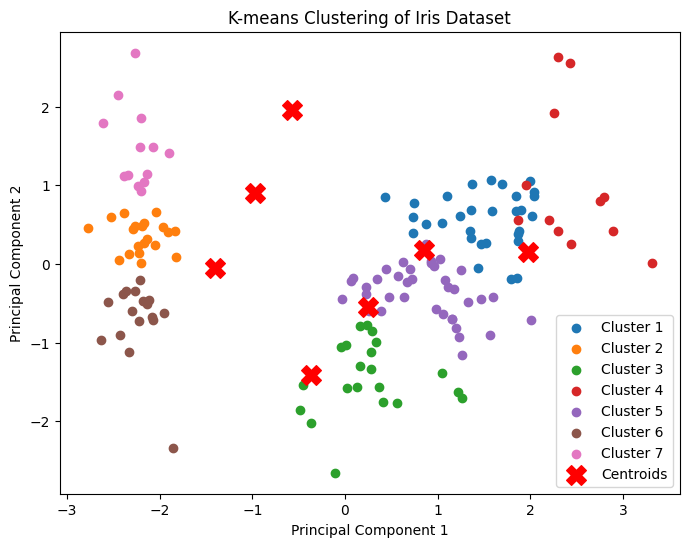

## Taking input for prediction


Enter value for sepal length (cm):  5
Enter value for sepal width (cm):  4
Enter value for petal length (cm):  3
Enter value for petal width (cm):  7



Predicted cluster for the new data: 1


C:\Users\aliga\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

iris = load_iris()
data = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])
display(Markdown("## K Mean Clustering\n"))
print("This program demonstrates the use of K-means Clustering on the Iris dataset.")
print("The model is trained to cluster data points based on sepal length, sepal width, petal length, and petal width.\n")

display(data.head())



features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

user_clusters = int(input("Enter the number of clusters (e.g., 3): "))
kmeans = KMeans(n_clusters=user_clusters, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

data['cluster'] = labels

print("\nClusters assigned to the data points:")
display(data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'cluster']].head(10))

silhouette_avg = silhouette_score(X_scaled, labels)
print(f"\nSilhouette Score: {silhouette_avg:.2f}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for i in range(user_clusters):
    cluster_data = X_pca[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=200, c='red', label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

display(Markdown("## Taking input for prediction\n"))

new_data = []
for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    new_data.append(value)

# Standardize the new data
new_data_scaled = scaler.transform([new_data])

# Predict the cluster for the new data
new_data_cluster = kmeans.predict(new_data_scaled)
print(f"\nPredicted cluster for the new data: {new_data_cluster[0] + 1}")
